we will develop a simple deep learning classifier using Keras library to achieve 98.77% accuracy on the MNIST digits database. Also, we will build a Convolutional Neural Network (CNN) for the classification. 

The MNIST dataset is an image dataset of handwritten digits. It has has 60,000 training images and 10,000 test images, each of which are grayscale 28 x 28 sized images.



In [23]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Convolution2D as Conv2D
from keras.utils import np_utils
from keras import models
import os
import  cv2
import matplotlib.pyplot as plt

# Loading the dataset

In [26]:
# MNIST data can be loaded from the keras library. 
from keras.datasets import mnist

def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

In [27]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

print(train_labels[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3]


In [28]:
print(np.amax(train_samples))
print(np.amin(train_samples))

255
0


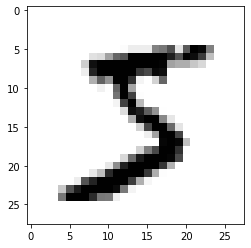

Label of image is 5


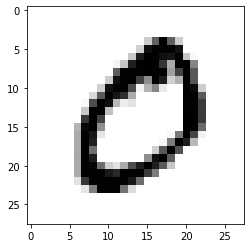

Label of image is 0


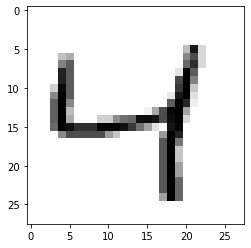

Label of image is 4


In [29]:
for i in range(0,3):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", train_labels[i])

# Data Preparation

Normalize the inputs

In [30]:
def convert_dtype(x):
   
    
    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [31]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [32]:
# to check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [33]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):
    
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)



In [34]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

# Convolutional Neural network model

Keras is a very versatile, deep learning library that can run on-top-of several other deep learning frameworks — it supports Tensorflow, Theano and Microsoft CNTK, with Tensorflow being the default. 
Keras can be used both with a CPU as well as a GPU.



In [37]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
model = tf.keras.Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 700)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               358912    
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [39]:
results = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=20, batch_size=250)

Epoch 1/20
216/216 [==============================] - 16s 76ms/step - loss: 0.3083 - accuracy: 0.9069 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 2/20
216/216 [==============================] - 16s 72ms/step - loss: 0.0780 - accuracy: 0.9760 - val_loss: 0.0479 - val_accuracy: 0.9875
Epoch 3/20
216/216 [==============================] - 16s 75ms/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0438 - val_accuracy: 0.9878
Epoch 4/20
216/216 [==============================] - 16s 73ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 5/20
216/216 [==============================] - 16s 74ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 6/20
216/216 [==============================] - 16s 74ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0367 - val_accuracy: 0.9902
Epoch 7/20
216/216 [==============================] - 16s 75ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0370 - val_accuracy:

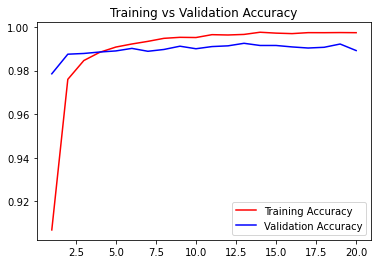

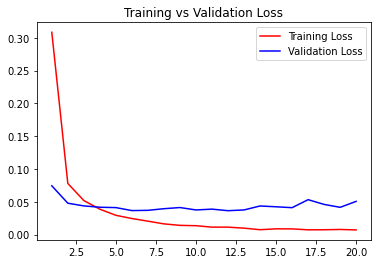

In [42]:
epoch_xaxis = range(1, len(results.history['accuracy'])+1)

plt.plot(epoch_xaxis, results.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epoch_xaxis, results.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epoch_xaxis, results.history['loss'], 'r', label='Training Loss')
plt.plot(epoch_xaxis, results.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [43]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.978500,0.906852,0.074422,0.308299,1
1,0.987500,0.975963,0.047910,0.078035,2
2,0.987833,0.984593,0.043793,0.051941,3
3,0.988500,0.988389,0.041744,0.038774,4
4,0.989000,0.990778,0.041208,0.029460,5
5,0.990167,0.992185,0.036659,0.024544,6
6,0.988833,0.993389,0.037043,0.020551,7
7,0.989667,0.994778,0.039521,0.016402,8
8,0.991167,0.995241,0.041283,0.014158,9
9,0.990000,0.995148,0.037630,0.013622,10


In [44]:
def predict(x):
    y = model.predict(x)
    return y

predicted_labels_train = predict(train_samples)

In [45]:
def oneHot_tolabel(y):
    
    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b
    

In [46]:
def accuracy(x_train, y_train, model):
    
    loss,acc = model.evaluate(train_samples, train_labels,verbose=0) 
    return acc

acc = accuracy(train_samples, train_labels, model)
print('Train accuracy is, ', acc*100, '%')

Train accuracy is,  99.81666803359985 %


# Testing the data

In [47]:
def create_confusion_matrix(true_labels, predicted_labels):
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels.argmax(axis=1), predicted_labels.argmax(axis=1))
    return cm

cm = create_confusion_matrix((train_labels), (predict(train_samples)))
print(cm)

[[5917    0    2    1    0    0    0    0    1    2]
 [   0 6738    0    1    0    1    2    0    0    0]
 [   0    1 5956    0    0    0    0    0    1    0]
 [   0    0    1 6128    0    1    0    0    1    0]
 [   0    3    0    0 5815    0    1    3    1   19]
 [   0    0    1    7    0 5406    5    0    2    0]
 [   0    0    0    0    1    0 5916    0    1    0]
 [   0    4   16    6    0    0    0 6236    0    3]
 [   0    0    3    8    0    0    0    0 5840    0]
 [   1    0    0    4    1    3    0    0    2 5938]]


The confusion matrix gives the performance of our model on a set of test data.

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

print(
    f"Classification report for classifier :\n"
    f"{classification_report(train_labels.argmax(axis=1), predict(train_samples).argmax(axis=1))}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000




In [48]:
def accuracy(x_test, y_test, model):
    
    loss,acc = model.evaluate(test_samples, test_labels,verbose=0) 
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  99.04000163078308 %


In [49]:
# Final evaluation of the model
scores = model.evaluate(test_samples, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.96%


# Summary
In this notebook I showed you how we can use Keras to develop a CNN that achieves 99.04% accuracy on the MNIST digits dataset. 